## Import Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

## Train & Test File CleanUp

In [2]:
# Read both train and test data
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

In [3]:
# Check for missing values in the train and test file 
null_values_train = train.isnull().sum().sort_values(ascending = False)
null_values_train

null_values_test = test.isnull().sum().sort_values(ascending = False)
null_values_test

Product_Category_3            162562
Product_Category_2             72344
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [4]:
# Because Product 3 and 2 have missing values, calculate the % of missing values
null_values_train = null_values_train[null_values_train >0]/train.shape[0]
null_values_test = null_values_test[null_values_test >0]/train.shape[0]
print(f'{null_values_train*100} %')
print(f'{null_values_test*100} %')

Product_Category_3    69.672659
Product_Category_2    31.566643
dtype: float64 %
Product_Category_3    29.553073
Product_Category_2    13.151829
dtype: float64 %


In [5]:
# Convert all null values to 0. It is assumed that the if it is null value, the customer did not buy such product
train = train.fillna(0)
test =  test.fillna(0)

In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
# Lets drop User ID and Product ID
# drop_columns = ['User_ID', 'Product_ID']
# train.drop(drop_columns, inplace = True, axis =1)
# test.drop(drop_columns, inplace = True, axis =1)

In [8]:
# Need to convert all objects to numeric. Let's start with Stay_In_Current_City_Years
train['Stay_In_Current_City_Years'].unique()

# # Convert 4+ to 4

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'4+':4, '1':1, '2':2, '3':3,'0':0})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'4+':4, '1':1, '2':2, '3':3,'0':0})

train['Stay_In_Current_City_Years'].unique()


array([2, 4, 3, 1, 0], dtype=int64)

In [9]:
# Need to convert all objects to numeric.

train['City_Category'].unique()
train['City_Category'] = train['City_Category'].map({'A':0, 'B':1, 'C':2})
test['City_Category'] = test['City_Category'].map({'A':0, 'B':1, 'C':2})
train['City_Category'].unique()

array([0, 2, 1], dtype=int64)

In [10]:
# Need to convert all objects to numeric.

train['Age'].unique()
train['Age'] = train['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
test['Age'] = test['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
train['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [11]:
# Need to convert all objects to numeric.

train['Gender'].unique()
train['Gender'] = train['Gender'].map({'F':0, 'M':1})
test['Gender'] = test['Gender'].map({'F':0, 'M':1})
train['Gender'].unique()

array([0, 1], dtype=int64)

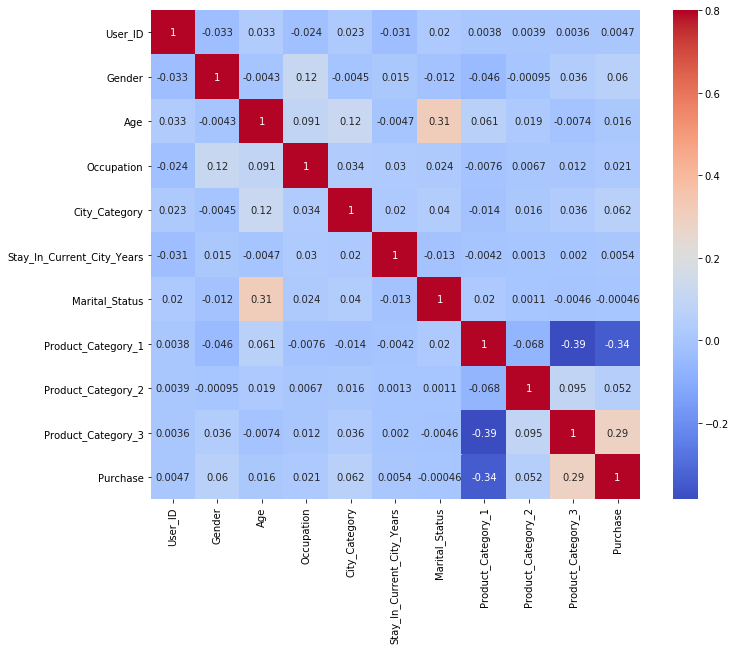

In [12]:
# Create a correlation matrix to find out which independent variable is correlated with the dependent variable
correlation_matrix = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation_matrix, vmax=0.8, cmap="coolwarm", square=True, annot = True)
plt.savefig("../images/corr_matrix.png", bbox_inches = "tight")

In [13]:
# Why product category 3 is correlated with dependent variable purchase and the others are not?
cat_1_average = train['Product_Category_1'].mean()
cat_2_average = train['Product_Category_2'].mean()
cat_3_avarage= train['Product_Category_3'].mean()
print(f"PC1: {cat_1_average} \n PC2: {cat_2_average} \n PC3 : {cat_3_avarage} \n Hence we can conclude the correlation of PC3 is due to average price. PC3 has on average the cheaper price")

PC1: 5.404270017525106 
 PC2: 6.735436346051761 
 PC3 : 3.841941359977312 
 Hence we can conclude the correlation of PC3 is due to average price. PC3 has on average the cheaper price


In [14]:
# sns.pairplot(train, kind = 'reg')
# plt.show()

# # sns.pairplot(train)
# # plt.show()
# plt.savefig("../images/corr_pairplot.png", bbox_inches = "tight")

In [15]:
# sns.pairplot(train)
# plt.show()
# plt.savefig("../images/corr_pairplot5.png", bbox_inches = "tight")

In [16]:
# sns.pairplot(data = train[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2","Product_Category_3"]], hue = "Purchase", dropna = True)
# plt.savefig("../images/corr_pairplot3.png", bbox_inches = "tight")

In [17]:
# sns.pairplot(data = train[["Age","Marital_Status","Product_Category_3"]],diag_kind="kde")
# plt.savefig("../images/corr_pairplot4.png", bbox_inches = "tight")

In [18]:
# sns.pairplot(train, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )
# plt.savefig("../images/corr_pairplot2.png", bbox_inches = "tight")

## Data Preparation for Model

In [19]:
# Remove category 19 and 20 fron Product Category 1 from Train
removal = train.index[(train.Product_Category_1.isin([19,20]))]
train = train.drop(removal)

In [20]:
# Convert Stay_in_current_city_years to binary by using dummy variables
train = pd.get_dummies(train, columns=['Stay_In_Current_City_Years'])
# test = pd.get_dummies(test, columns=['Stay_In_Current_City_Years'])
# dummy_gender = pd.get_dummies(train['Gender'])
# dummy_age = pd.get_dummies(train['Age'])
# dummy_city = pd.get_dummies(train['City_Category'])
# dummy_current_city = pd.get_dummies(train['Stay_In_Current_City_Years'])

In [21]:
# Check data types
train.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [ ]:
# Save clean file
train.to_csv("../../data/trainCLEAN.csv", index=False, encoding='utf8')
test.to_csv("../../data/testCLEAN.csv", index=False, encoding='utf8')

## Build Model

In [ ]:
# # Join Train and Test Dataset to prepare both at once
# train['origin']='train'
# test['origin']='test'

# combined_data = pd.concat([train,test], ignore_index = True, sort = False)
# combined_data

In [ ]:
# Lets drop User ID and Product ID
drop_columns = ['User_ID', 'Product_ID']
train.drop(drop_columns, inplace = True, axis =1)
# test.drop(drop_columns, inplace = True, axis =1)

In [ ]:
train.columns

In [ ]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = train[['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4']]
y = train["Purchase"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

In [ ]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # need to add stratify = y but I get an error
### END SOLUTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION


In [ ]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

In [ ]:
# print('Intercept parameter:', model.intercept_)
# # coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
# # print(coefficients)
# coefficients = pd.DataFrame(X.columns,model.coef_)
# coefficients

In [ ]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION


In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error, mean_absolute_error


MSE = mean_squared_error(y_test_scaled, predictions)
RMSE = np.sqrt(MSE)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}, RMSE: {RMSE}")
# print("RMSE : %.4g" % np.sqrt(MSE))

In [ ]:
predictions

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")